In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_train=pd.read_csv("/content/train (1).csv")


In [25]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [26]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [29]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [30]:
# Replacing the null values 
df_train["HomePlanet"].fillna(method="ffill",inplace=True)
df_train["CryoSleep"].fillna(method="ffill",inplace=True)
df_train["Cabin"].fillna(method="ffill",inplace=True)
df_train["Destination"].fillna(method="ffill",inplace=True)
df_train["Age"].fillna(df_train["Age"].mean(),inplace=True)
df_train["VIP"].fillna(method="ffill",inplace=True)
df_train["RoomService"].fillna(df_train["RoomService"].mean(),inplace=True)
df_train["FoodCourt"].fillna(df_train["FoodCourt"].mean(),inplace=True)
df_train["ShoppingMall"].fillna(df_train["ShoppingMall"].mean(),inplace=True)
df_train["Spa"].fillna(df_train["Spa"].mean(),inplace=True)
df_train["VRDeck"].fillna(df_train["VRDeck"].mean(),inplace=True)
df_train["Name"].fillna(method="ffill",inplace=True)

In [31]:
df_train.drop(["PassengerId","Name","Cabin"],inplace=True,axis=1)


In [32]:
categorical_var=[i for i in df_train.columns if df_train[i].dtypes=='object']
for z in categorical_var:
    print(df_train[z].name,':',df_train[z].unique())

HomePlanet : ['Europa' 'Earth' 'Mars']
Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for x in [i for i in df_train.columns if len(df_train[i].unique())==2]:
    df_train[x]= label_encoder.fit_transform(df_train[x])

In [34]:
#Encode Variables with more than 2 Classes
df_train= pd.get_dummies(df_train, columns= [i for i in df_train.columns if df_train[i].dtypes=='object'],drop_first=True)

In [35]:
df_train.shape

(8693, 13)

In [36]:
df_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,1


In [38]:
df_train.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
CryoSleep,1.000000,-0.069536,-0.074514,-0.241492,-0.204231,-0.207543,-0.196714,-0.190897,0.456062,0.099645,0.031567,0.082260,-0.111217
Age,-0.069536,1.000000,0.089766,0.067612,0.127937,0.032655,0.120992,0.099210,-0.074249,0.217570,0.015350,-0.028885,0.002341
VIP,-0.074514,0.089766,1.000000,0.054668,0.124234,0.017867,0.058806,0.120842,-0.034560,0.141912,0.044770,0.002217,-0.039050
RoomService,-0.241492,0.067612,0.054668,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.242048,-0.070724,0.245602,-0.063379,0.062641
FoodCourt,-0.204231,0.127937,0.124234,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.046074,0.362259,-0.125583,-0.064593,-0.078826
ShoppingMall,-0.207543,0.032655,0.017867,0.052962,-0.013934,1.000000,0.013678,-0.007189,0.010019,-0.020641,0.109000,-0.031464,0.030941
Spa,-0.196714,0.120992,0.058806,0.009925,0.220587,0.013678,1.000000,0.147957,-0.218791,0.263188,-0.088133,-0.052944,-0.034362
VRDeck,-0.190897,0.099210,0.120842,-0.019207,0.224275,-0.007189,0.147957,1.000000,-0.204825,0.284061,-0.113087,-0.046906,-0.048869
Transported,0.456062,-0.074249,-0.034560,-0.242048,0.046074,0.010019,-0.218791,-0.204825,1.000000,0.179814,0.019601,-0.000755,-0.096587
HomePlanet_Europa,0.099645,0.217570,0.141912,-0.070724,0.362259,-0.020641,0.263188,0.284061,0.179814,1.000000,-0.294959,-0.166010,-0.153239


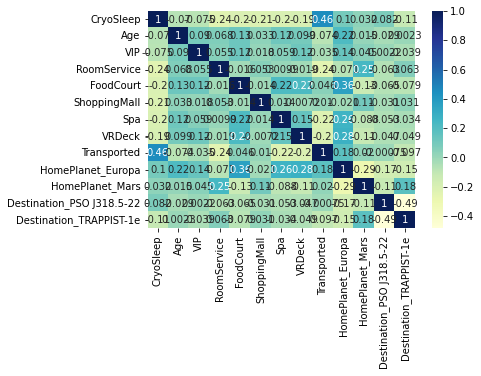

In [39]:
dataplot = sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)

In [52]:
X = df_train.drop(["Transported"], axis =1 )
y = df_train["Transported"]


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.15, random_state= 20)

In [54]:
from sklearn.ensemble  import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)


RandomForestClassifier()

In [55]:
y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       617
           1       0.81      0.79      0.80       687

    accuracy                           0.79      1304
   macro avg       0.79      0.79      0.79      1304
weighted avg       0.79      0.79      0.79      1304



# **TEST DATASET**

In [59]:
df_test= pd.read_csv("/content/test.csv")

In [60]:
df = pd.read_csv("/content/test.csv")

In [44]:
df_test["HomePlanet"].fillna(method="ffill",inplace=True)
df_test["CryoSleep"].fillna(method="ffill",inplace=True)
df_test["Cabin"].fillna(method="ffill",inplace=True)
df_test["Destination"].fillna(method="ffill",inplace=True)
df_test["Age"].fillna(df_test["Age"].mean(),inplace=True)
df_test["VIP"].fillna(method="ffill",inplace=True)
df_test["RoomService"].fillna(df_test["RoomService"].mean(),inplace=True)
df_test["FoodCourt"].fillna(df_test["FoodCourt"].mean(),inplace=True)
df_test["ShoppingMall"].fillna(df_test["ShoppingMall"].mean(),inplace=True)
df_test["Spa"].fillna(df_test["Spa"].mean(),inplace=True)
df_test["VRDeck"].fillna(df_test["VRDeck"].mean(),inplace=True)
df_test["Name"].fillna(method="ffill",inplace=True)

In [45]:
df_test.drop(["PassengerId","Name","Cabin"],inplace=True,axis=1)

In [46]:
categorical_var=[i for i in df_test.columns if df_test[i].dtypes=='object']
for z in categorical_var:
    print(df_test[z].name,':',df_test[z].unique())

HomePlanet : ['Earth' 'Europa' 'Mars']
Destination : ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22']


In [47]:
label_encoder=LabelEncoder()
for x in [i for i in df_test.columns if len(df_test[i].unique())==2]:
    df_test[x]= label_encoder.fit_transform(df_test[x])

In [48]:
#Encode Variables with more than 2 Classes
df_test= pd.get_dummies(df_test, columns= [i for i in df_test.columns if df_test[i].dtypes=='object'],drop_first=True)

In [58]:
df_test.shape

(4277, 12)

In [57]:
y_pred1 = rf.predict(df_test)

# **Submission**

In [61]:
sub=pd.DataFrame({'PassengerId':df["PassengerId"],"Transported":y_pred1.astype('bool')})

In [62]:
sub.to_csv('submission.csv',index=False)
pd.read_csv('submission.csv')

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [66]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>